<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Top" data-toc-modified-id="Top-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Top</a></span><ul class="toc-item"><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>SMOTE</a></span><ul class="toc-item"><li><span><a href="#DecisionTree-GridSearch" data-toc-modified-id="DecisionTree-GridSearch-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>DecisionTree GridSearch</a></span></li><li><span><a href="#KNN-GridSearch" data-toc-modified-id="KNN-GridSearch-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>KNN GridSearch</a></span></li><li><span><a href="#XGBoost-GridSearch" data-toc-modified-id="XGBoost-GridSearch-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>XGBoost GridSearch</a></span></li><li><span><a href="#MLP-Classifier-GridSearch" data-toc-modified-id="MLP-Classifier-GridSearch-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>MLP Classifier GridSearch</a></span></li><li><span><a href="#Ensemble-Methods" data-toc-modified-id="Ensemble-Methods-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Ensemble Methods</a></span><ul class="toc-item"><li><span><a href="#Bagging-temp" data-toc-modified-id="Bagging-temp-1.1.5.1"><span class="toc-item-num">1.1.5.1&nbsp;&nbsp;</span>Bagging temp</a></span></li></ul></li></ul></li><li><span><a href="#Undersamping" data-toc-modified-id="Undersamping-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Undersamping</a></span><ul class="toc-item"><li><span><a href="#XGBoost-GridSearch" data-toc-modified-id="XGBoost-GridSearch-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>XGBoost GridSearch</a></span></li></ul></li><li><span><a href="#Class-Weights" data-toc-modified-id="Class-Weights-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Class Weights</a></span></li></ul></li></ul></div>

# Top

In [1]:
import pandas as pd

# Load CSV file using pandas
df = pd.read_csv('data.csv', sep=';')

# Display the first 5 rows of the data
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
# Print the shape of the data
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns")

# Display basic statistics of the data
display(df.describe())

# Check for missing values in the data
print(df.isnull().sum())

Data has 4424 rows and 37 columns


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [3]:
# Define X and y variables
y = df['Target']
X = df.drop('Target', axis=1)

# Print the shapes of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (4424, 36)
y shape: (4424,)


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with a 90/10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Split the train data into train and validation sets with an 80/10/10 split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print the shapes of the data
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (3582, 36), y_train shape: (3582,)
X_test shape: (443, 36), y_test shape: (443,)
X_val shape: (399, 36), y_val shape: (399,)


C:\Users\aiden\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aiden\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


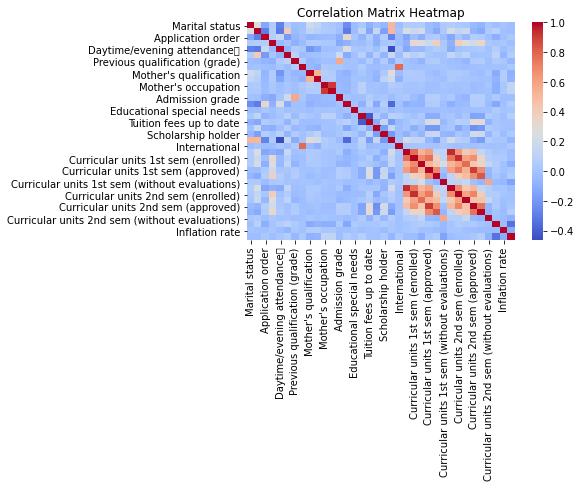

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

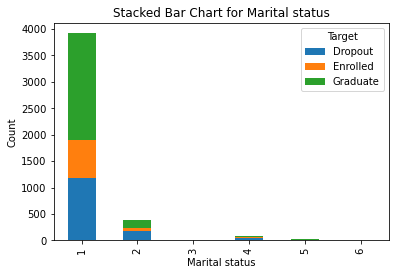

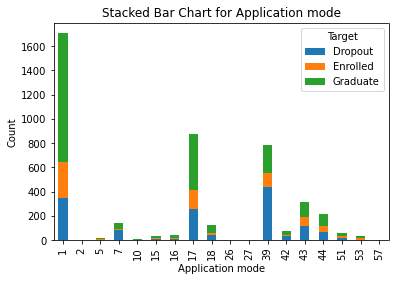

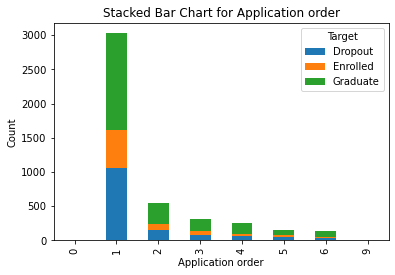

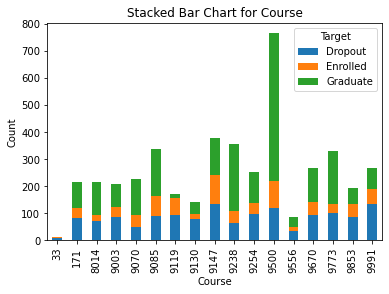

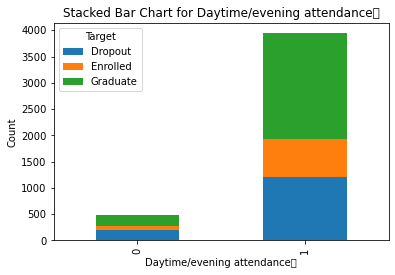

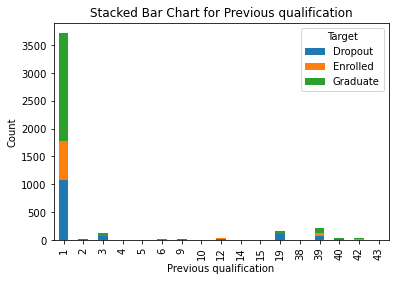

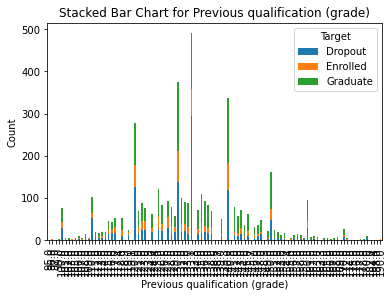

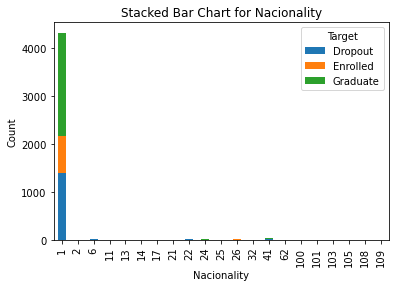

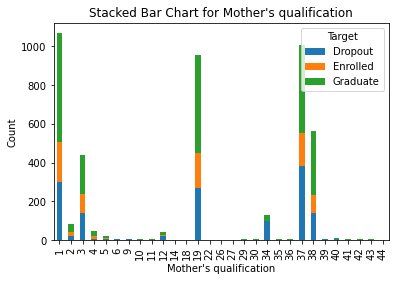

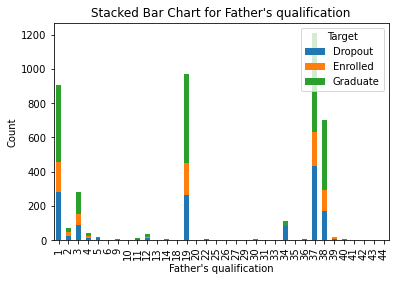

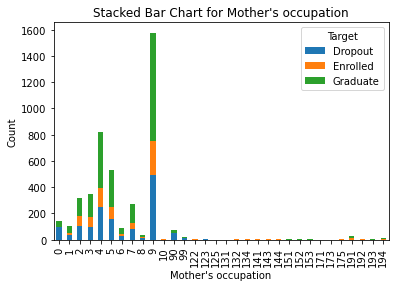

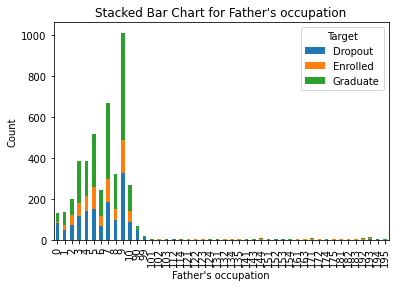

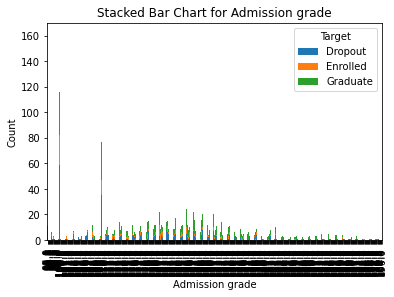

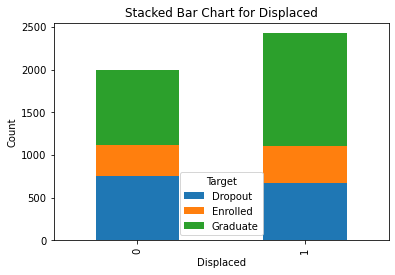

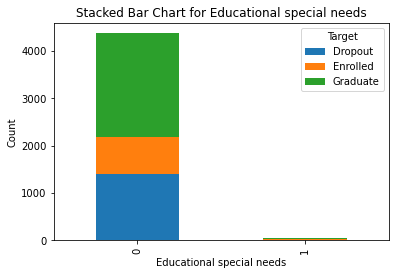

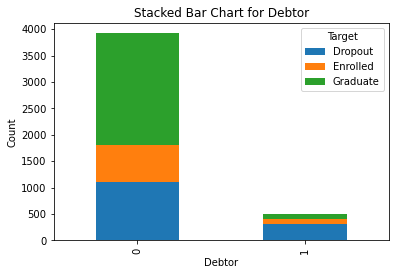

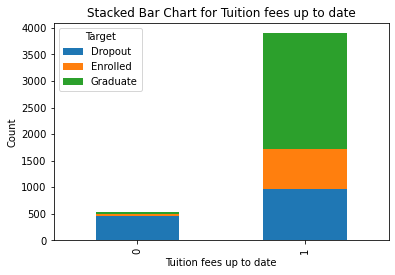

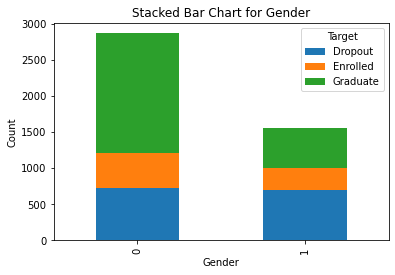

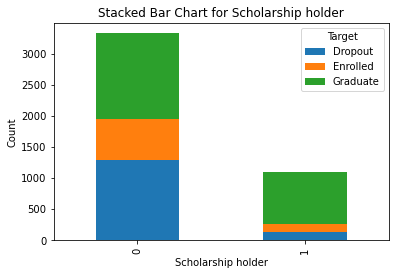

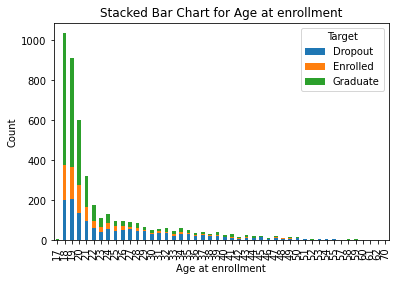

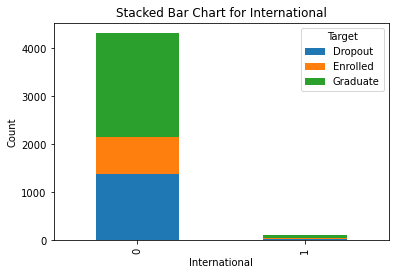

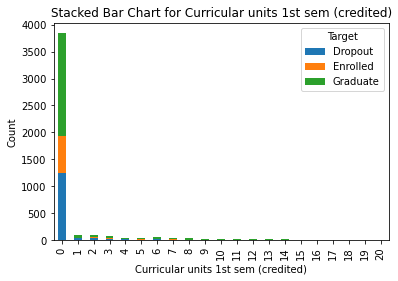

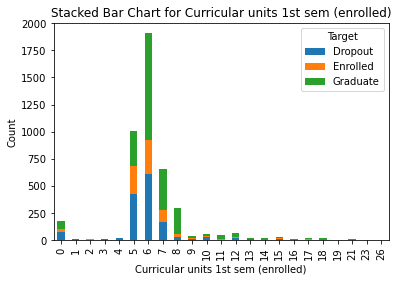

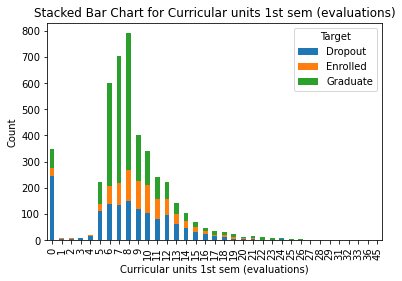

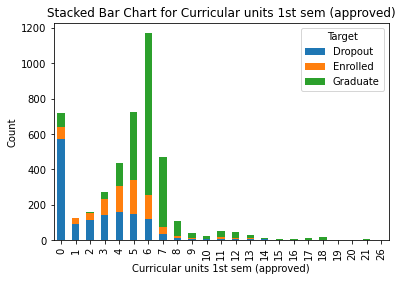

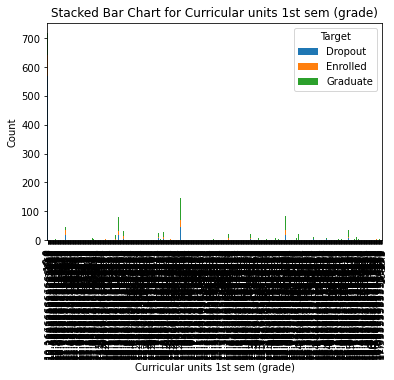

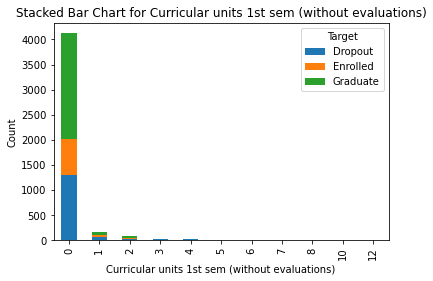

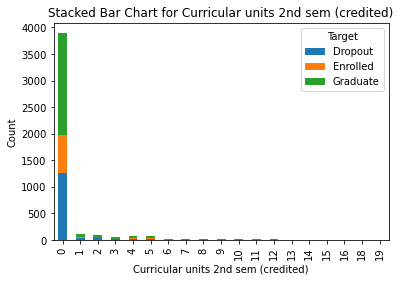

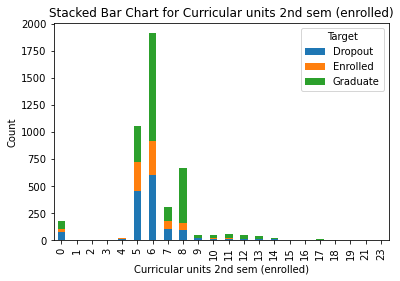

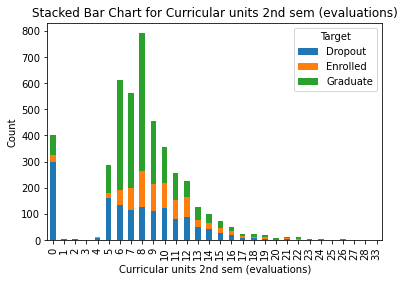

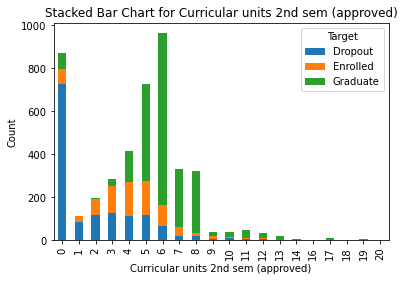

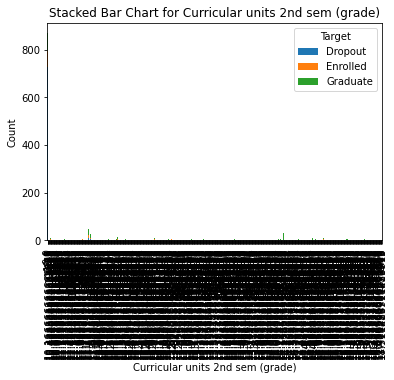

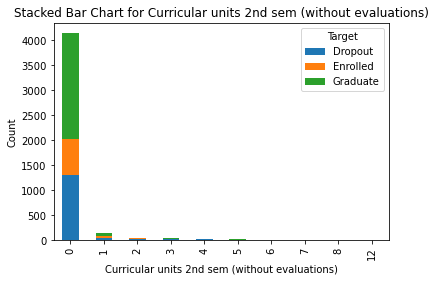

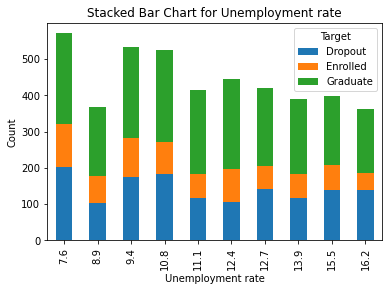

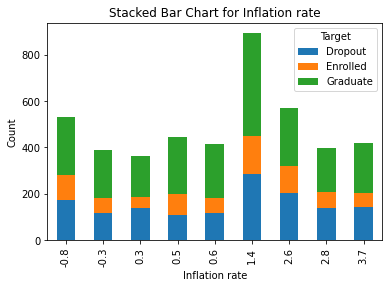

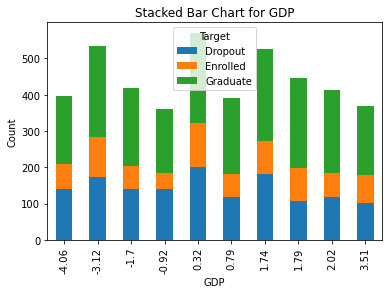

In [6]:
# Create a stacked bar chart for each column
for col in df.columns:
    if col != 'Target':
        df.groupby([col, 'Target'])['Target'].count().unstack().plot(kind='bar', stacked=True)
        plt.title(f"Stacked Bar Chart for {col}")
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


## SMOTE

In [7]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with sampling_strategy='auto' (to balance the classes)
sm = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to X_train and y_train
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [8]:
# Print the shapes of the data
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_train_sm shape: {X_train_sm.shape}, y_train_sm shape: {y_train_sm.shape}")

X_train shape: (3582, 36), y_train shape: (3582,)
X_train_sm shape: (5424, 36), y_train_sm shape: (5424,)


In [9]:
# Dataset target before SMOTE
print('Dataset target before SMOTE:')
print(df['Target'].value_counts(normalize=True))
print()
# Dataset target after SMOTE
print('Dataset target after SMOTE:')
print(y_train_sm.value_counts(normalize=True))

Dataset target before SMOTE:
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: Target, dtype: float64

Dataset target after SMOTE:
Graduate    0.333333
Dropout     0.333333
Enrolled    0.333333
Name: Target, dtype: float64


### DecisionTree GridSearch

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid to search over
param_grid = {
    'clf__max_depth': [2, 4, 6, 8],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Create a GridSearchCV object, passing in the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_sm, y_train_sm)

# Once the search is complete, the best hyperparameters and associated score can be accessed
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Finally, the best estimator can be accessed and used to make predictions on new data
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

     Dropout       0.89      0.64      0.74       148
    Enrolled       0.35      0.56      0.43        63
    Graduate       0.79      0.81      0.80       188

    accuracy                           0.71       399
   macro avg       0.68      0.67      0.66       399
weighted avg       0.76      0.71      0.72       399



### KNN GridSearch

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance']
}

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Create a GridSearchCV object, passing in the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_sm, y_train_sm)

# Once the search is complete, the best hyperparameters and associated score can be accessed
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Finally, the best estimator can be accessed and used to make predictions on new data
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

     Dropout       0.83      0.65      0.73       148
    Enrolled       0.27      0.44      0.34        63
    Graduate       0.76      0.73      0.75       188

    accuracy                           0.66       399
   macro avg       0.62      0.61      0.61       399
weighted avg       0.71      0.66      0.68       399



### XGBoost GridSearch

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the pipeline steps
steps_xg_sm = [('scaler', StandardScaler()),
         ('xgb', XGBClassifier())]

# Create the pipeline
pipeline_xg_sm = Pipeline(steps_xg_sm)

# Define the hyperparameters to tune
parameters_xg_sm = {'xgb__max_depth': [3, 4, 5],
              'xgb__learning_rate': [0.1, 0.01, 0.001],
              'xgb__n_estimators': [50, 100, 200]}

# Instantiate GridSearchCV
grid_search_xg_sm = GridSearchCV(pipeline_xg_sm, 
                                 parameters_xg_sm, 
                                 cv=5, 
                                 n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search_xg_sm.fit(X_train_sm, y_train_sm)

# Once the search is complete, the best hyperparameters and associated score can be accessed
best_params_xg_sm = grid_search_xg_sm.best_params_
best_score_xg_sm = grid_search_xg_sm.best_score_

# Finally, the best estimator can be accessed and used to make predictions on new data
best_estimator_xg_sm = grid_search_xg_sm.best_estimator_
y_pred_xg_sm = best_estimator_xg_sm.predict(X_val)
print(classification_report(y_val, y_pred_xg_sm))

              precision    recall  f1-score   support

     Dropout       0.86      0.78      0.82       148
    Enrolled       0.42      0.41      0.42        63
    Graduate       0.81      0.88      0.84       188

    accuracy                           0.77       399
   macro avg       0.70      0.69      0.69       399
weighted avg       0.77      0.77      0.77       399



### MLP Classifier GridSearch

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define the pipeline steps
steps = [('scaler', StandardScaler()),
         ('mlp', MLPClassifier())]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameters to tune
parameters = {'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
              'mlp__activation': ['relu', 'tanh', 'logistic'],
              'mlp__solver': ['adam', 'lbfgs'],
              'mlp__alpha': [0.0001, 0.001, 0.01]}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_sm, y_train_sm)

# Once the search is complete, the best hyperparameters and associated score can be accessed
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Finally, the best estimator can be accessed and used to make predictions on new data
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       148
    Enrolled       0.37      0.43      0.40        63
    Graduate       0.83      0.83      0.83       188

    accuracy                           0.74       399
   macro avg       0.68      0.68      0.67       399
weighted avg       0.76      0.74      0.75       399



C:\Users\aiden\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Ensemble Methods

Ensemble method is a machine learning technique that combines the predictions from multiple individual models to produce a more accurate and robust final prediction. The idea behind this approach is to combine the strengths of several models to overcome their individual weaknesses and limitations.

There are different types of ensemble methods, including:

Bagging (Bootstrapped Aggregating): This method involves training multiple models on different random subsets of the training data, and then averaging or voting on their predictions to produce the final result.

Boosting: This method involves training multiple models sequentially, where each subsequent model tries to correct the mistakes made by the previous model.

Stacking: This method involves training multiple models on the same training data, and then using their predictions as input features to train a higher-level model that makes the final prediction.

Ensemble methods have been shown to be very effective in many real-world applications and have become a popular choice for data scientists. By combining the predictions of multiple models, they can lead to improved performance, reduced overfitting, and increased robustness compared to individual models.

#### Bagging temp

In [14]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Train a bagging ensemble using random forest and KNN models
ensemble = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=100,
    max_samples=0.5,
    max_features=0.5,
    bootstrap=True,
    bootstrap_features=True,
    random_state=42
)
ensemble.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble performance
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)



Accuracy: 0.7200902934537246


## Undersamping

In [15]:
from imblearn.under_sampling import RandomUnderSampler

# create the RandomUnderSampler object
rus = RandomUnderSampler(sampling_strategy='auto')

# fit and apply the under-sampling
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Print the shapes of the data
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_resampled shape: {X_resampled.shape}, y_resampled shape: {y_resampled.shape}")

X_train shape: (3582, 36), y_train shape: (3582,)
X_resampled shape: (1944, 36), y_resampled shape: (1944,)


In [16]:
# Dataset target before Undersamping
print('Dataset target before Undersamping:')
print(df['Target'].value_counts(normalize=True))
print()
# Dataset target after Undersamping
print('Dataset target after Undersamping:')
print(y_resampled.value_counts(normalize=True))

Dataset target before Undersamping:
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: Target, dtype: float64

Dataset target after Undersamping:
Dropout     0.333333
Enrolled    0.333333
Graduate    0.333333
Name: Target, dtype: float64


### XGBoost GridSearch

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the pipeline steps
steps = [('scaler', StandardScaler()),
         ('xgb', XGBClassifier())]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameters to tune
parameters = {'xgb__max_depth': [3, 4, 5],
              'xgb__learning_rate': [0.1, 0.01, 0.001],
              'xgb__n_estimators': [50, 100, 200]}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=4)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_resampled, y_resampled)

# Once the search is complete, the best hyperparameters and associated score can be accessed
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Finally, the best estimator can be accessed and used to make predictions on new data
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

     Dropout       0.90      0.70      0.79       148
    Enrolled       0.36      0.60      0.45        63
    Graduate       0.84      0.79      0.81       188

    accuracy                           0.73       399
   macro avg       0.70      0.70      0.68       399
weighted avg       0.78      0.73      0.75       399



## Class Weights

In [18]:
y_train.value_counts()

Graduate    1808
Dropout     1126
Enrolled     648
Name: Target, dtype: int64

In [20]:
# from xgboost import XGBClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# # Define the scaler
# scaler = StandardScaler()

# # Fit and transform the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Define the XGBClassifier
# xgb = XGBClassifier()

# # Define the hyperparameters to tune
# parameters = {'n_estimators': [50, 100, 200],
#               'max_depth': [3, 5, 7],
#               'learning_rate': [0.01, 0.1, 0.5]}

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(xgb, parameters, cv=5, n_jobs=-1)

# # Fit the GridSearchCV object on the training data with class_weight
# grid_search.fit(X_train_scaled, y_train, class_weight={0: 1, 1: 1808/1126, 2: 1808/648})


In [ ]:
# from xgboost import XGBClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# # Define the scaler
# scaler = StandardScaler()

# # Fit and transform the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Define the XGBClassifier
# xgb = XGBClassifier()

# # Define the hyperparameters to tune
# parameters = {'n_estimators': [50, 100, 200],
#               'max_depth': [3, 5, 7],
#               'learning_rate': [0.01, 0.1, 0.5]}

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(xgb, parameters, cv=5, n_jobs=-1)

# # Fit the XGBClassifier object on the training data with class_weight
# xgb.fit(X_train_scaled, y_train, class_weight={0: 1, 1: 1808/1126, 2: 1808/648})

# # Fit the GridSearchCV object on the training data
# grid_search.fit(X_train_scaled, y_train)


In [21]:
import xgboost as xgb

print(xgb.__version__)
# 1.2.1 - original version (before updating, worked fine just couldnt use class weight)

# pip install -U xgboost

1.2.1


In [ ]:
# pip install xgboost==1.2.1